In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
human_df = pd.read_table("human_data.txt")

In [4]:
human_df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [5]:
# Loading the chimpanse and dog data

chimpanse_df = pd.read_table("chimp_data.txt")
dog_df = pd.read_table("dog_data.txt")

print(chimpanse_df.head())
print(dog_df.head())

                                            sequence  class
0  ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...      4
2  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
3  ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...      4
4  ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...      6
                                            sequence  class
0  ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...      4
1  ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...      4
2  ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...      6
3  ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...      6
4  ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...      0


In [6]:
# We will be using "k-mer counting"

## k-mer counting is really helpful in "DNA- sequencing and Transcriptions". 
#  We basically convert the DNA sequences as a languages. So, to use that we use the k-mer counting.
# Whenever we wanna use the NLP techniques like count of words (ie) bag of words basically or TF-IDF.

### How we do that:

## In this dataset, we have a huge list of sequences in each and every record, but donot know how many vectors we need to consider with.
## So, with the k-mer counting, I make a fix set of count variable/vector.

## Suppose, I wanna use a "word" of length 6(hexamers).. "ATGCATGCA" becomes: "ATGCAT","TGCATG","GCATGC","CATGCA"
   ## Hence, our example sequence is broken down into 4 hexamer words

In [7]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)

def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [8]:
human_df['words'] = human_df.apply(lambda x: getKmers(x['sequence']), axis = 1)

human_df.head()

,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [9]:
human_df = human_df.drop('sequence', axis = 1)

In [10]:
human_df

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [11]:
chimpanse_df['words'] = chimpanse_df.apply(lambda x: getKmers(x['sequence']), axis =1)
chimpanse_df.head()

,sequence,class,words
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [12]:
chimpanse_df = chimpanse_df.drop('sequence',axis = 1)

In [13]:
chimpanse_df.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [14]:
dog_df['words'] = dog_df.apply(lambda x: getKmers(x['sequence']), axis =1)
dog_df.head()

,sequence,class,words
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [15]:
dog_df = dog_df.drop('sequence', axis = 1)

In [16]:
dog_df.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [1]:
### Note:  Since we are using the sklearn's NLP toolkit to do the k-mers counting, we need to now convert the 
##      list of k-mers for each gene into string sentences of words that the count vectorize can use..

## We can make y_variable 

In [20]:
human_texts = list(human_df['words'])

for i in range(len(human_texts)):
    human_texts[i] = ' '.join(human_texts[i])
y_human = human_df.iloc[:,0].values

In [21]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [23]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

## Repeat the same operation for chimpanse and dog

In [24]:
chimpanse_text = list(chimpanse_df['words'])

for i in range(len(chimpanse_text)):
    chimpanse_text[i] = ' '.join(chimpanse_text[i])
    
y_chimpanse = chimpanse_df.iloc[:,0].values

In [25]:
dog_text = list(dog_df['words'])

for i in range(len(dog_text)):
    dog_text[i] = ' '.join(dog_text[i])
    
y_dog = dog_df.iloc[:,0].values

In [26]:
### Now we will use the "BAG OF WORDS" model using the CountVectorizer() of the NLP technique

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (4,4))
X = cv.fit_transform(human_texts)

X_chimpanse = cv.fit_transform(chimpanse_text)

X_dog = cv.fit_transform(dog_text)


In [30]:
print(X)

  (0, 52803)	1
  (0, 207969)	1
  (0, 136621)	1
  (0, 79202)	1
  (0, 78295)	2
  (0, 74681)	2
  (0, 60650)	1
  (0, 6563)	1
  (0, 25724)	1
  (0, 101750)	1
  (0, 176196)	1
  (0, 3017)	1
  (0, 11772)	1
  (0, 46030)	1
  (0, 181326)	1
  (0, 25976)	1
  (0, 102780)	1
  (0, 180265)	1
  (0, 21456)	1
  (0, 84717)	1
  (0, 99209)	1
  (0, 163924)	1
  (0, 187178)	1
  (0, 53731)	1
  (0, 211749)	1
  :	:
  (4379, 198518)	1
  (4379, 164856)	1
  (4379, 150748)	1
  (4379, 134240)	1
  (4379, 212199)	1
  (4379, 153025)	1
  (4379, 142876)	1
  (4379, 103635)	1
  (4379, 19522)	1
  (4379, 39966)	1
  (4379, 157552)	1
  (4379, 232202)	1
  (4379, 231582)	1
  (4379, 15135)	1
  (4379, 20267)	1
  (4379, 79879)	1
  (4379, 80930)	1
  (4379, 105544)	1
  (4379, 227125)	1
  (4379, 132325)	1
  (4379, 156977)	1
  (4379, 17192)	1
  (4379, 115050)	1
  (4379, 98593)	1
  (4379, 170831)	1


In [31]:
print(X_chimpanse)

  (0, 52357)	1
  (0, 205463)	1
  (0, 135407)	1
  (0, 78630)	1
  (0, 77729)	2
  (0, 74128)	2
  (0, 60151)	1
  (0, 6493)	1
  (0, 25507)	1
  (0, 100816)	1
  (0, 174048)	1
  (0, 2965)	1
  (0, 11615)	1
  (0, 45405)	1
  (0, 177987)	1
  (0, 20957)	1
  (0, 82607)	1
  (0, 92971)	1
  (0, 136820)	1
  (0, 84070)	1
  (0, 98333)	1
  (0, 162273)	1
  (0, 184408)	1
  (0, 51391)	1
  (0, 201635)	1
  :	:
  (1681, 174991)	1
  (1681, 51650)	1
  (1681, 181568)	1
  (1681, 53995)	1
  (1681, 203492)	1
  (1681, 72704)	1
  (1681, 94239)	1
  (1681, 213264)	1
  (1681, 157139)	1
  (1681, 156632)	1
  (1681, 161596)	1
  (1681, 154159)	1
  (1681, 134999)	1
  (1681, 78933)	1
  (1681, 170427)	1
  (1681, 182268)	1
  (1681, 195248)	1
  (1681, 95126)	1
  (1681, 48535)	1
  (1681, 165295)	1
  (1681, 99179)	1
  (1681, 50321)	1
  (1681, 146894)	1
  (1681, 141579)	1
  (1681, 48254)	1


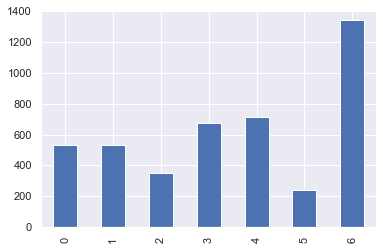

In [35]:
### Checking if the Dataset is balanced or not

human_df['class'].value_counts().sort_index().plot.bar()

In [36]:
# Splitting the dataset into train and test

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y_human, test_size = 0.20, random_state = 42)

In [38]:
# Model Building

In [43]:
## Here, we will be using Multinomial naive Bayes classifier

## The alpha parameter was determined by the "Grid search" method

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
### Let's look at some of the model metrics like the "confusion matrix, accuracy, f1_score, precision and recall"

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("The confusion matrix \n")

print(pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predicted')))
print()

print("The accuracy score is",accuracy_score(y_test, y_pred))
print("The precision score is", precision_score(y_test,y_pred,average = 'weighted'))
print("The recall score is", recall_score(y_test,y_pred, average = 'weighted'))
print("The f1 score is", f1_score(y_test,y_pred, average = 'weighted'))

The confusion matrix 

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263

The accuracy score is 0.9840182648401826
The precision score is 0.984290543482443
The recall score is 0.9840182648401826
The f1 score is 0.9840270014702487
